- Are sahrks gender discriminative?
- Waht percentage of the attacks occur when doing activities like boat trips, fishing, surfing...?
- ~~Which species is te most agresive?~~ (too many unique values)
- Whats the mortality rate of a shark attack?
- Do they increase or decrease alongst the years?
- What are the most common injuries (parts of the body)?
- How many megalodon attack are...?
- what time of the day do more attack occur?
- waht range of age is the most attacked?
- where do they occur? country/region

In [64]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from geopy.geocoders import Nominatim
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')


In [65]:
# Set the style for Seaborn
sns.set(style="whitegrid")

In [66]:
df = pd.read_csv("../data/shark_attacks_clean.csv")

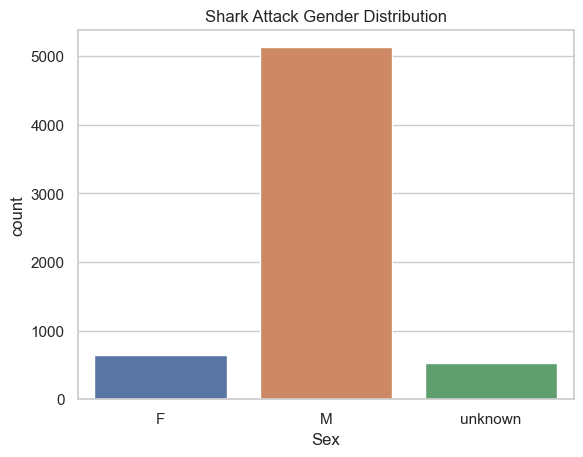

In [67]:
# Question 1: Are sharks gender discriminative?
sns.countplot(x='Sex', data=df)
plt.title("Shark Attack Gender Distribution")
plt.savefig('../images/shark_attacks_gender.png')
plt.show()

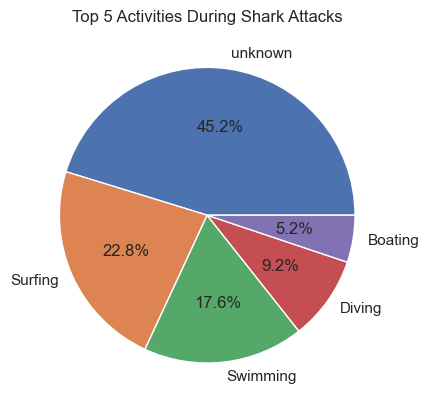

In [68]:
# Question 2: What percentage of the attacks occur when doing activities like boat trips, fishing, surfing...?
activity_counts = df['Activity'].value_counts().nlargest(5)
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Activities During Shark Attacks")
plt.savefig('../images/shark_attacks_per_activity.png')
plt.show()

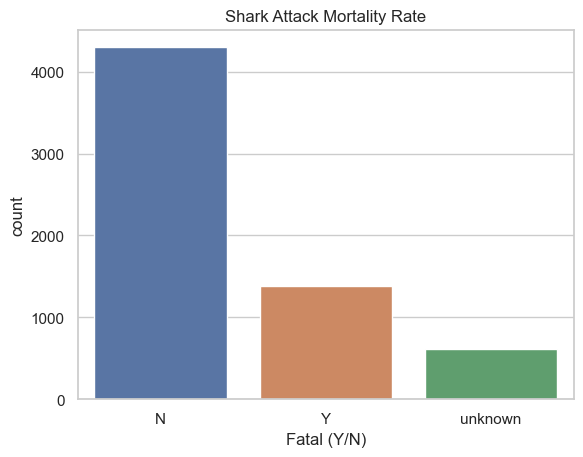

In [69]:
# Question 3: What's the mortality rate of a shark attack?
sns.countplot(x='Fatal (Y/N)', data=df)
plt.title("Shark Attack Mortality Rate")
plt.savefig('../images/shark_attacks_fatality.png')
plt.show()

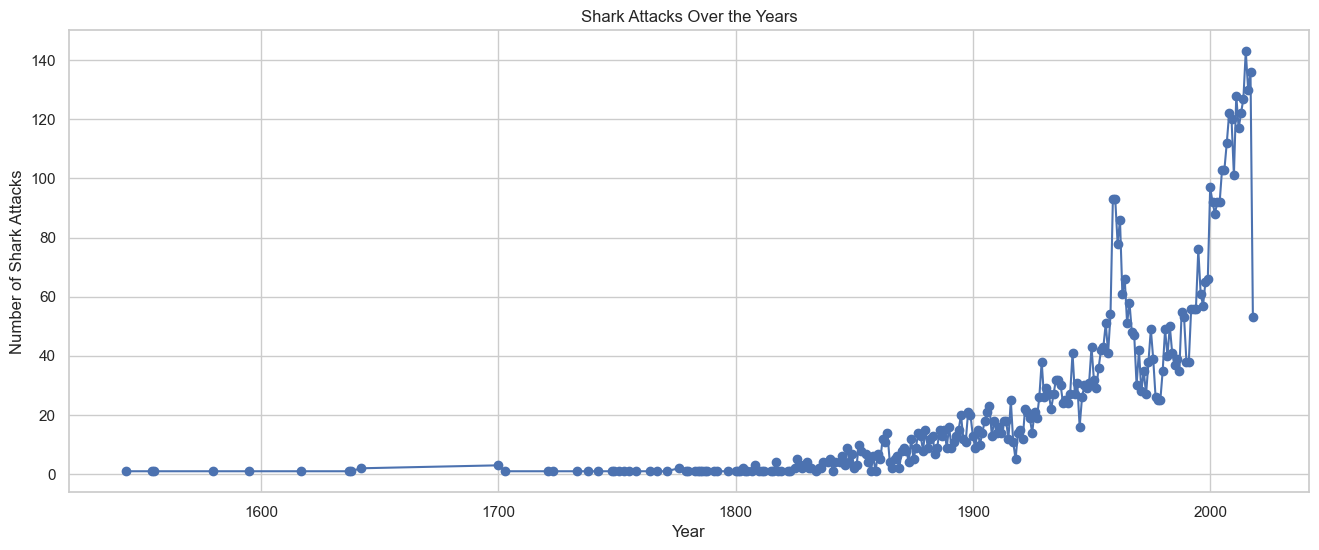

In [70]:
# Question 4: Do they increase or decrease along the years?
# Create a subset of the DataFrame without modifying the original DataFrame
subset_df = df.dropna(subset=['Year'])
yearly_counts = subset_df['Year'].value_counts().sort_index()
# Create a line plot
plt.figure(figsize=(16, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Shark Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.grid(True)
plt.savefig('../images/shark_attacks_over_years.png')
plt.show()

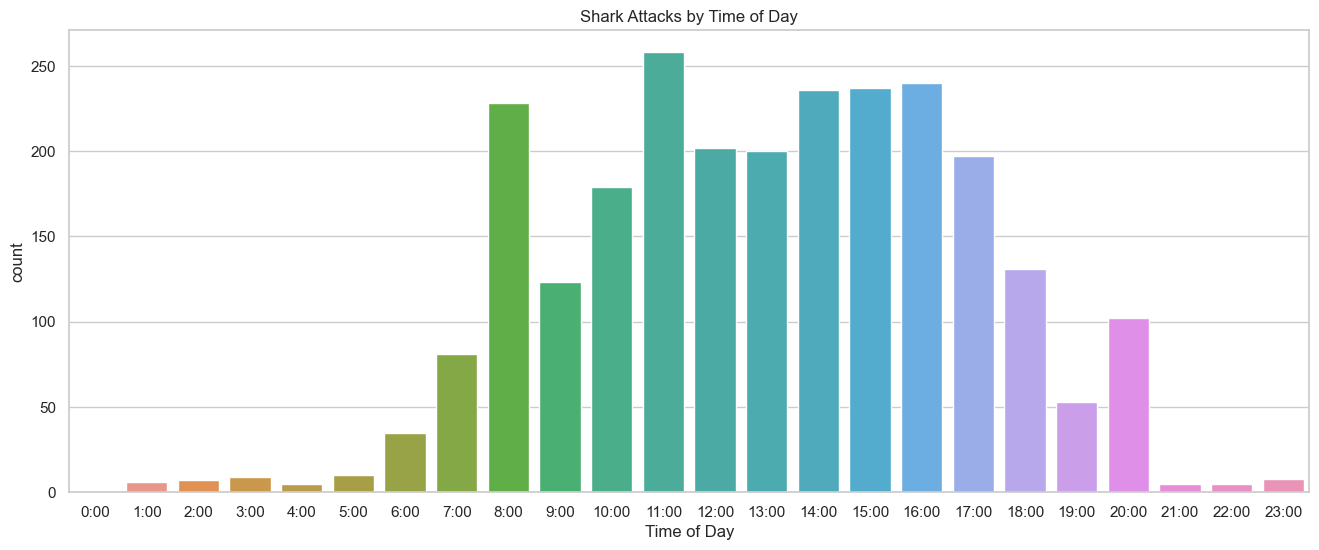

In [71]:
# Question 5: What time of the day do more attacks occur?
# Extract the hour part and convert it to float
df['Hour'] = df['Time'].str.extract(r'(\d{2}):\d{2}').astype(float)
# Create a countplot with the x-axis labels formatted as time
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='Hour', data=df)
ax.set_xticklabels([f'{int(x)}:00' for x in ax.get_xticks()])  # Format the x-axis labels as time
plt.title("Shark Attacks by Time of Day")
plt.xlabel("Time of Day")
plt.savefig('../images/shark_attacks_by_time.png')
plt.show()


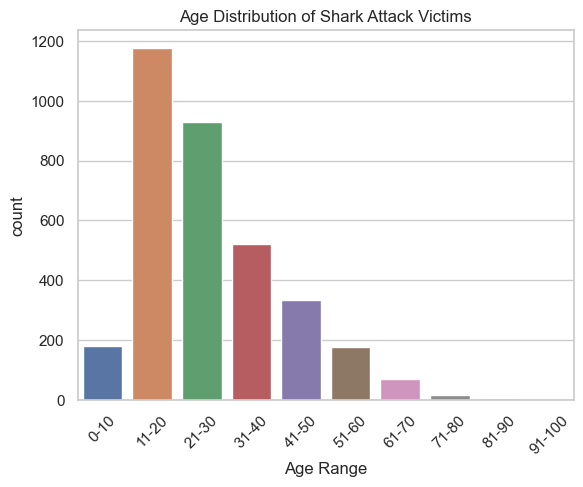

In [72]:
# Question 6: What range of age is the most attacked?
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
sns.countplot(x='Age Range', data=df)
plt.title("Age Distribution of Shark Attack Victims")
plt.xlabel("Age Range")
plt.xticks(rotation=45)
plt.savefig('../images/shark_attacks_victim_ages.png')
plt.show()


In [73]:
import plotly.express as px

# Group the data by 'Country' and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create a choropleth map using Plotly
fig = px.choropleth(
  country_counts, 
  locations='Country', 
  locationmode='country names',
  color='Attack Count',
  color_continuous_scale='Viridis',
  title='Shark Attacks by Country'
)

fig.update_geos(projection_type="natural earth")
fig.show()